In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from matplotlib.patheffects import Stroke
from matplotlib.transforms import offset_copy
import cartopy.feature as cfeature
import shapely.geometry as sgeom
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
#os.environ["CARTOPY_USER_BACKGROUNDS"] = './cartopy_data'
#stamen_terrain = cimgt.Stamen('terrain-background')
#stamen_terrain = cimgt.Stamen('watercolor')

stamen_terrain = cimgt.GoogleTiles('RGB', style='satellite')

geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
out_dir = './out_figures'

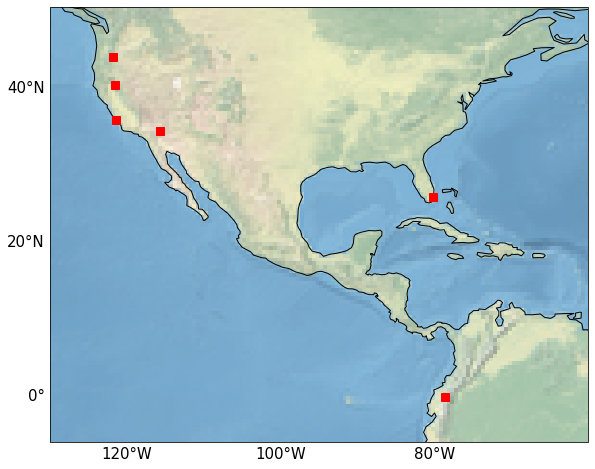

In [6]:
plt.rcParams["font.size"] = "15"

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(projection=proj))
ax.stock_img()
ax.coastlines()

extent = [-130, -60, -5, 45]

ax.set_extent(extent)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-120, -100, -80, -60])
gl.ylocator = mticker.FixedLocator([0, 20, 40])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

points_lalo = [[-0.171, -78.598],
              [25.88, -80.125],
              [40.476, -121.484],
              [35.864, -121.432],
              [44.1042, -121.7656],
              [34.4520, -115.6737]]

symbols = ['r^', 'rs', 'r^', 'rs']
              
for po in points_lalo:
    ax.plot(po[1], po[0], 'rs', markersize=8, transform=proj)
    

plt.savefig(out_dir + '/Map_case_studies.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

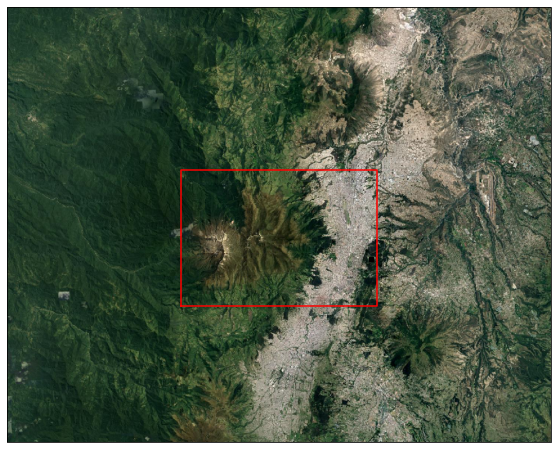

In [21]:
## Pichincha

plt.rcParams["font.size"] = "16"


#fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()})


box = ['-0.35:0.05','-78.8:-78.3']  

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]


points_lalo = np.array([(-0.225, -78.64),
                        (-0.225, -78.46),
                        (-0.10, -78.46),
                        (-0.10, -78.64),
                        (-0.225, -78.64)])
quito = (-0.181592, -78.465099)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

ax.add_image(stamen_terrain, 12)
#ax.background_img(name='ETOPO', resolution='high')

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. 
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

ax.plot(points_lalo[:,1], points_lalo[:,0], '-', color='red', markersize=12, transform=ccrs.PlateCarree())
#ax.text(points_lalo[0,1]-0.8, points_lalo[0,0]+0.4, 'Mt. Pichincha', color='black',fontsize=15, transform=ccrs.PlateCarree())
ax.plot(quito[1], quito[0], 's', color='black', markersize=4, transform=ccrs.PlateCarree())
#ax.text(quito[1]+0.1, quito[0]-0.2, 'Quito', color='black', fontsize=15, transform=ccrs.PlateCarree())

plt.savefig(out_dir + '/Pichincha_subset.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

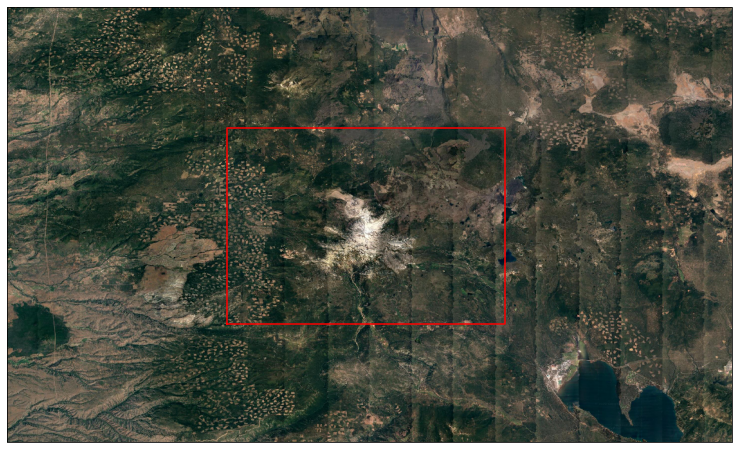

In [22]:
#Lassen
plt.rcParams["font.size"] = "16"



#fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()})


box = ['40.2:40.8','-122:-121']#attr['mintpy.subset.lalo'].split(',')
lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

points_lalo = np.array([(40.3632, -121.6971),
                        (40.3632, -121.3132),
                        (40.6334, -121.3132),
                        (40.6334, -121.6971),
                        (40.3632, -121.6971)])
# sacramento = (38.579623, -121.494598) 
chico = (39.728851, -121.838621)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

ax.add_image(stamen_terrain, 12)
#ax.background_img(name='ETOPO', resolution='high')

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. 
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

ax.plot(points_lalo[:,1], points_lalo[:,0], '-', color='red', markersize=12, transform=ccrs.PlateCarree())
#ax.text(points_lalo[0,1]-0.8, points_lalo[0,0]+0.4, 'Mt. Pichincha', color='black',fontsize=15, transform=ccrs.PlateCarree())
ax.plot(chico[1], chico[0], 's', color='black', markersize=4, transform=ccrs.PlateCarree())
#ax.text(quito[1]+0.1, quito[0]-0.2, 'Quito', color='black', fontsize=15, transform=ccrs.PlateCarree())

plt.savefig(out_dir + '/Lassen_subset.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

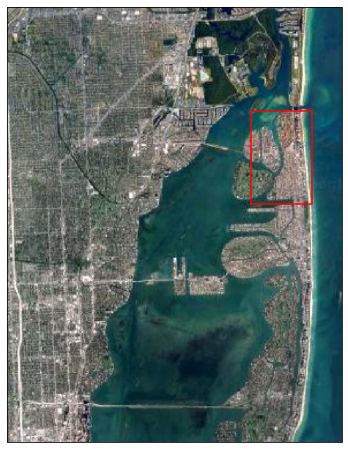

In [23]:
## Miami

plt.rcParams["font.size"] = "16"


#fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()})


box = ['25.8:25.93','-80.21:-80.11']

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

points_lalo = np.array([(25.871, -80.137),
                        (25.871, -80.119),
                        (25.899, -80.119),
                        (25.899, -80.137),
                        (25.871, -80.137)])
# sacramento = (38.579623, -121.494598) 
miami = (25.7616, -80.1920)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

ax.add_image(stamen_terrain, 12)
#ax.background_img(name='ETOPO', resolution='high')

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. 
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

ax.plot(points_lalo[:,1], points_lalo[:,0], '-', color='red', markersize=12, transform=ccrs.PlateCarree())
#ax.text(points_lalo[0,1]-0.8, points_lalo[0,0]+0.4, 'Mt. Pichincha', color='black',fontsize=15, transform=ccrs.PlateCarree())
ax.plot(miami[1], miami[0], 's', color='black', markersize=4, transform=ccrs.PlateCarree())
#ax.text(quito[1]+0.1, quito[0]-0.2, 'Quito', color='black', fontsize=15, transform=ccrs.PlateCarree())

plt.savefig(out_dir + '/Miami_subset.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

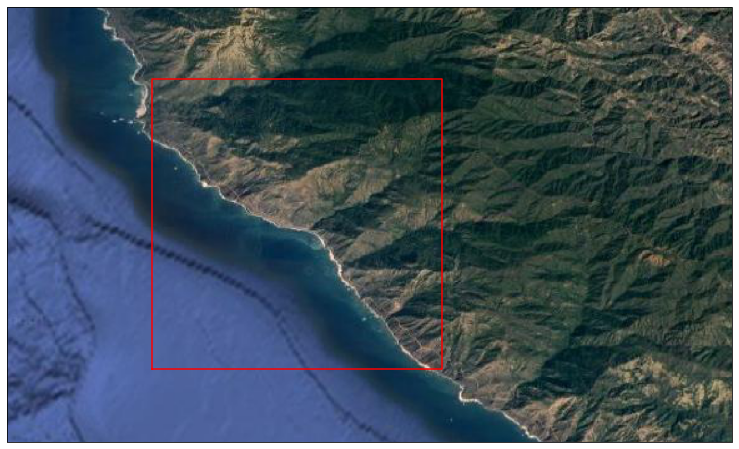

In [24]:
## Mudcreek

plt.rcParams["font.size"] = "16"


#fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()})


box = ['35.8:35.92','-121.5:-121.3']#attr['mintpy.subset.lalo'].split(',')
lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

points_lalo = np.array([(35.82, -121.46),
                        (35.82, -121.38),
                        (35.90, -121.38),
                        (35.90, -121.46),
                        (35.82, -121.46)])
# sacramento = (38.579623, -121.494598) 
park = (35.921, -121.36)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

ax.add_image(stamen_terrain, 12)
#ax.background_img(name='ETOPO', resolution='high')

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. 
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

ax.plot(points_lalo[:,1], points_lalo[:,0], '-', color='red', markersize=12, transform=ccrs.PlateCarree())
#ax.text(points_lalo[0,1]-0.8, points_lalo[0,0]+0.4, 'Mt. Pichincha', color='black',fontsize=15, transform=ccrs.PlateCarree())
ax.plot(park[1], park[0], 's', color='black', markersize=4, transform=ccrs.PlateCarree())
#ax.text(quito[1]+0.1, quito[0]-0.2, 'California', color='black', fontsize=15, transform=ccrs.PlateCarree())

plt.savefig(out_dir + '/Mudcreek_subset.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()